# Loan Data from Prosper Exploration
## by David Bohnhoff

## Preliminary Wrangling

This document explores a dataset containing 81 variables for approximately 114,000 loans. The variables contain information like loan amount, interest rate, borrower income and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Loading the dataset

In [2]:
df = pd.read_csv('data/prosperLoanData.csv')

#making a copy of the original data
df_original = df.copy()

High level overview of the data

In [3]:
df.shape

(113937, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Looking at specific variables which probably need to be turned into categorical types and adding the Defintion as comment

In [5]:
df.CreditGrade.unique()
#The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [6]:
df.LoanStatus.unique()
#The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [7]:
df['ProsperRating (numeric)'].dtypes

dtype('float64')

In [8]:
df['ProsperRating (numeric)'].unique()
#The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.

array([nan,  6.,  3.,  5.,  2.,  4.,  7.,  1.])

In [9]:
df['ProsperRating (Alpha)'].unique()
#The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [10]:
df.IsBorrowerHomeowner.unique()

array([ True, False])

In [11]:
df.Occupation.unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [12]:
df.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [13]:
#Replace nan with 'Not available' for consistency
df.EmploymentStatus = df.EmploymentStatus.replace(np.nan, 'Not available')

In [14]:
df.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [15]:
#Renaming ProsperRating (numeric) and ProsoperRating (Alpha)
df.rename(columns = {'ProsperRating (numeric)' : 'ProsperRating_numeric', 'ProsperRating (Alpha)' : 'ProsperRating_Alpha'}, inplace = True)

In [16]:
df.ProsperScore.unique()
#A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

array([nan,  7.,  9.,  4., 10.,  2., 11.,  8.,  5.,  3.,  6.,  1.])

In [17]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [18]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating_numeric,ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [19]:
# convert CreditGrade, LoanStatus, ProsperRating_Alpha, EmploymentStatus and IncomeRange into ordered categorical types 
ordinal_var_dict = {'CreditGrade': ['NC', 'HR','E','D','C', 'B', 'A', 'AA'], 
                    'LoanStatus': ['Completed', 'Current', 'FinalPaymentInProgress', 'Defaulted', 'Cancelled', 'Chargedoff','Past Due (1-15 days)',  'Past Due (16-30 days)',  
                                   'Past Due (61-90 days)', 'Past Due (31-60 days)','Past Due (91-120 days)', 'Past Due (>120 days)'],
                    'ProsperRating_Alpha': ['HR','E','D','C', 'B', 'A', 'AA'],
                   'EmploymentStatus': ['Not employed', 'Part-time', 'Other', 'Retired', 'Self-employed', 'Full-time', 'Employed', 'Not available'],
                   'IncomeRange':['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed']
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [20]:
df.ProsperRating_Alpha.unique()

[NaN, A, D, B, E, C, AA, HR]
Categories (7, object): [HR < E < D < C < B < A < AA]

In [21]:
df.IncomeRange.unique()

[$25,000-49,999, $50,000-74,999, Not displayed, $100,000+, $75,000-99,999, $1-24,999, Not employed, $0]
Categories (8, object): [Not employed < $0 < $1-24,999 < $25,000-49,999 < $50,000-74,999 < $75,000-99,999 < $100,000+ < Not displayed]

### What is the structure of your dataset?

The Dataset contains 113,937 loans. Each loan has 81 variables. I looked closer at a few and their order which can be depict as followed:
worst --> best:
CreditGrade: NC, HR, E, D, C, B, A, AA
ProsperRating_Alpha: HR, E, D, C, B, A, AA
Logical order for the following:
LoanStatus: Completed, Current, FinalPaymentInProgress, Defaulted, Cancelled, Chargedoff, Past Due (1-15 days), Past Due (16-30 days), Past Due (61-90 days), Past Due (31-60 days), Past Due (91-120 days), Past Due (>120 days)

### What is/are the main feature(s) of interest in your dataset?

My mainfocus will be on the Borrower's Annual Percentage Rate (BorrowerAPR) and what features lead to a lower rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the CreditGrade, ProsperRating_Alpha and/or ProsperScore to be the best indicators for this. While a better Score should indicate a lower rate.
Further more I will look into factors like employment status (EmploymentStatus), income (IncomeRange) or if the borrower is a home owner (IsBorrowerHomeowner).

## Univariate Exploration

First I will look be looking at the distribution of the Borrower APR.

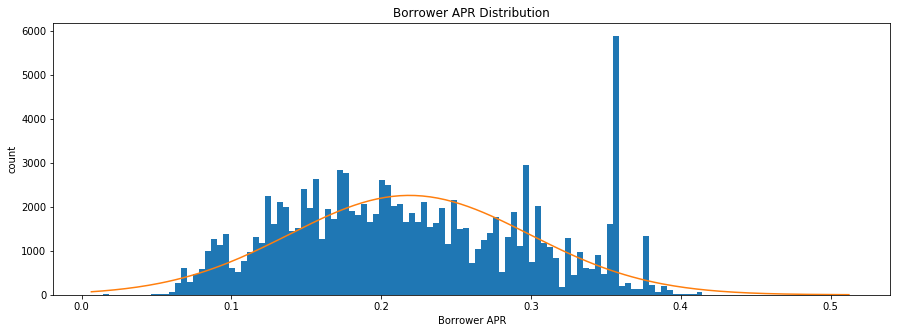

In [22]:
#creating a histogram for BorrowerAPR
plt.figure(figsize = [15, 5])
bins = np.arange(df.BorrowerAPR.min(), df.BorrowerAPR.max()+0.004, 0.004)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.title('Borrower APR Distribution')
plt.xlabel('Borrower APR')
plt.ylabel('count');

# overlay a theoretical normal distribution on top
samp_mean = df['BorrowerAPR'].mean()
samp_sd = df['BorrowerAPR'].std()

from scipy.stats import norm
x = np.linspace(df.BorrowerAPR.min(), df.BorrowerAPR.max(), 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= df.shape[0] * 0.004 # scale the distribution height

plt.plot(x, y);

The distribution is nearly normal distributed but with a clear peak between 0.3 and 0.4. I will zoom in on the values between 0.05 and 0.4 and lower the bin size.

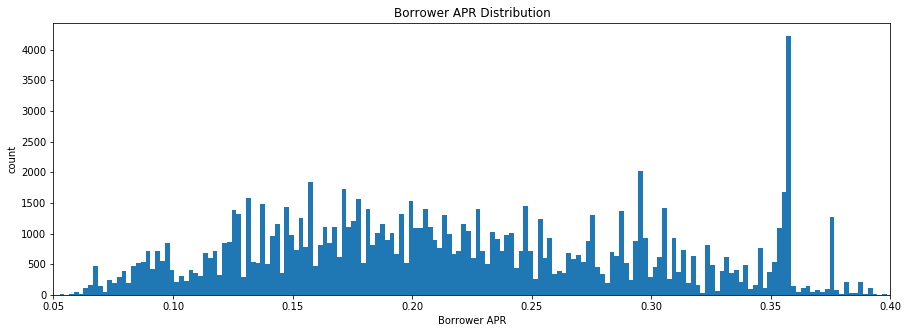

In [23]:
#creating a histogram for BorrowerAPR zoomed in to 0.05 till 0.4
plt.figure(figsize = [15, 5])
bins = np.arange(df.BorrowerAPR.min(), df.BorrowerAPR.max()+0.002, 0.002)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.title('Borrower APR Distribution')
plt.xlabel('Borrower APR')
plt.ylabel('count')
plt.xlim(0.05, 0.4);

The peak seems to be at 0.36 and will be investigated more later.

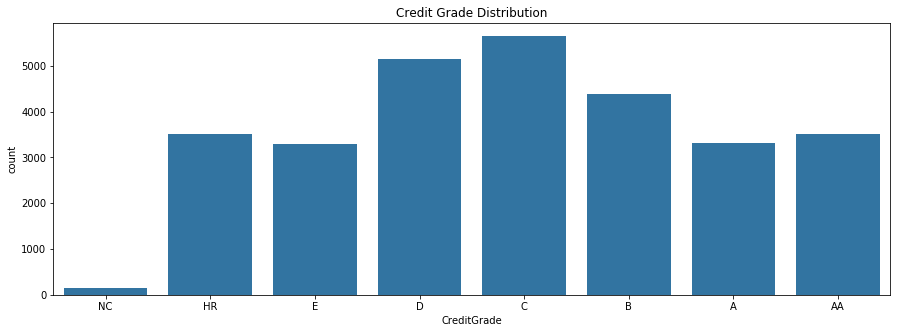

In [24]:
#creating a bar chart for CreditGrade
plt.figure(figsize = [15, 5])
color = sb.color_palette()[0]
sb.countplot(df.CreditGrade, color = color)
plt.title('Credit Grade Distribution');

Peak at the middle rating C while there is not much difference between the ratings HR, E, A and AA.

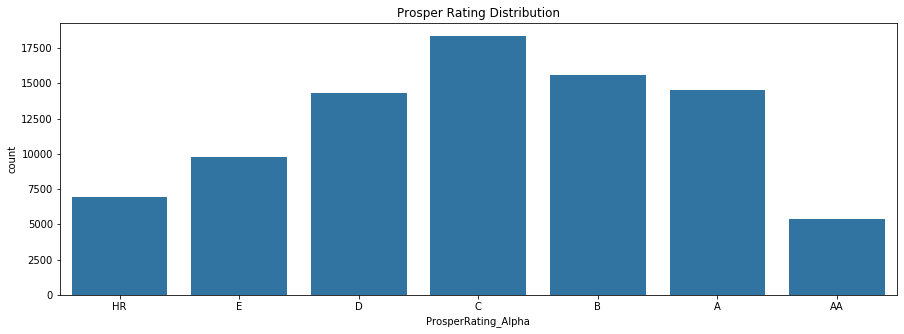

In [25]:
#creating a bar chart for ProsperRating
plt.figure(figsize = [15, 5])
color = sb.color_palette()[0]
sb.countplot(df.ProsperRating_Alpha, color = color)
plt.title('Prosper Rating Distribution');

Normal Distribution over the ratings. This rating looks like it will be more accurate.

In [26]:
#Number of loans that have no Prosper Rating
df.ProsperRating_Alpha.isnull().sum()

29084

In [27]:
#These will be removed
df_clean = df.dropna(subset=['ProsperRating_Alpha'])
df_clean.shape

(84853, 81)

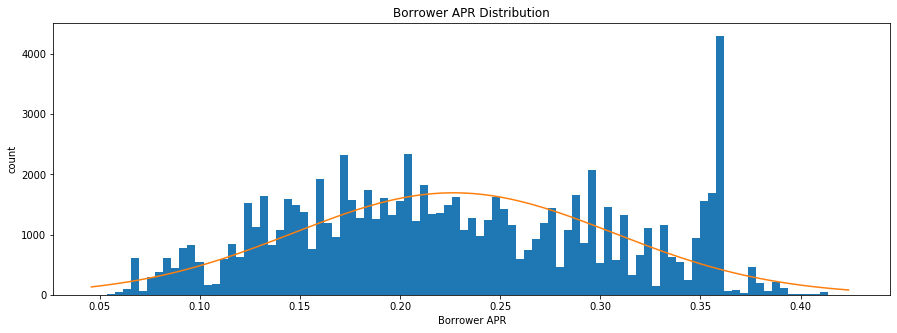

In [28]:
#creating a histogram for BorrowerAPR with the cleaned data
plt.figure(figsize = [15, 5])
bins = np.arange(df_clean.BorrowerAPR.min(), df_clean.BorrowerAPR.max()+0.004, 0.004)
plt.hist(data = df_clean, x = 'BorrowerAPR', bins = bins)
plt.title('Borrower APR Distribution')
plt.xlabel('Borrower APR')
plt.ylabel('count');

# overlay a theoretical normal distribution on top
samp_mean = df_clean['BorrowerAPR'].mean()
samp_sd = df_clean['BorrowerAPR'].std()

from scipy.stats import norm
x = np.linspace(df_clean.BorrowerAPR.min(), df_clean.BorrowerAPR.max(), 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= df_clean.shape[0] * 0.004 # scale the distribution height

plt.plot(x, y);

The distribtuion didn't change much after the cleaning

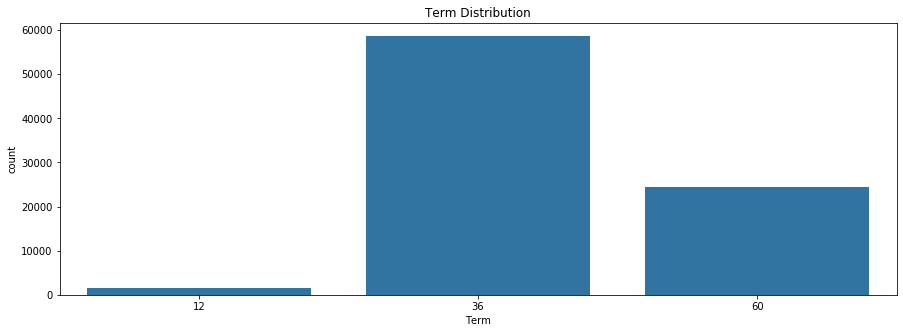

In [29]:
#creating a histogram for Term in months
plt.figure(figsize = [15, 5])
color = sb.color_palette()[0]
sb.countplot(df_clean.Term, color = color)
plt.title('Term Distribution');

Most loans have a term of 3 years followed by 5 years and a few with 1 year.

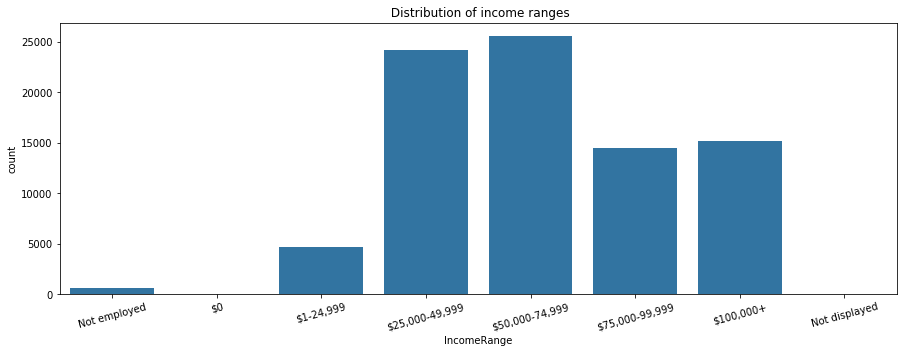

In [30]:
#creating a bar chart for the income ranges
plt.figure(figsize = [15, 5])
color = sb.color_palette()[0]
sb.countplot(df_clean.IncomeRange, color = color)
plt.xticks(rotation = 15)
plt.title(' Distribution of income ranges');

Most of the incomes lay in the middle ranges 25k-50k and 50k-75k with only very few in the cateogry Not employed and 0.

In [31]:
df_clean.IncomeRange.value_counts()

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
Not employed        649
$0                   45
Not displayed         0
Name: IncomeRange, dtype: int64

The category `not displayed` is due to the cleaning empty and can be removed

In [32]:
ordered_IncomeRange = pd.api.types.CategoricalDtype(ordered = True, categories = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'])
df_clean.IncomeRange = df_clean.IncomeRange.astype(ordered_IncomeRange)

F:\Anaconda3\envs\py3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [33]:
df_clean.IncomeRange.value_counts()

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

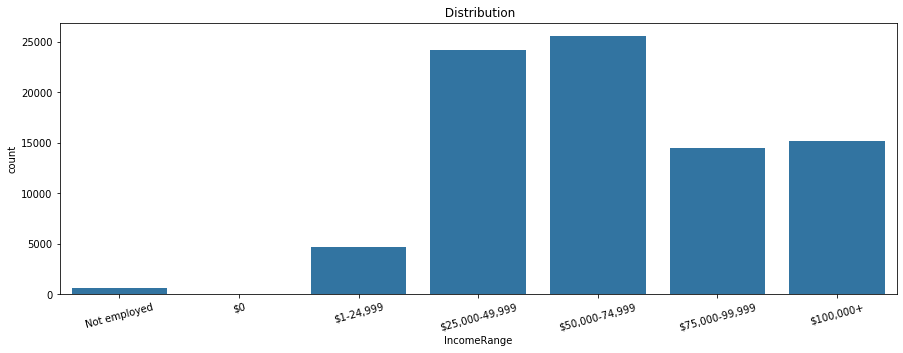

In [34]:
#creating the modified bar chart for the income ranges
plt.figure(figsize = [15, 5])
color = sb.color_palette()[0]
sb.countplot(df_clean.IncomeRange, color = color)
plt.xticks(rotation = 15)
plt.title(' Distribution');

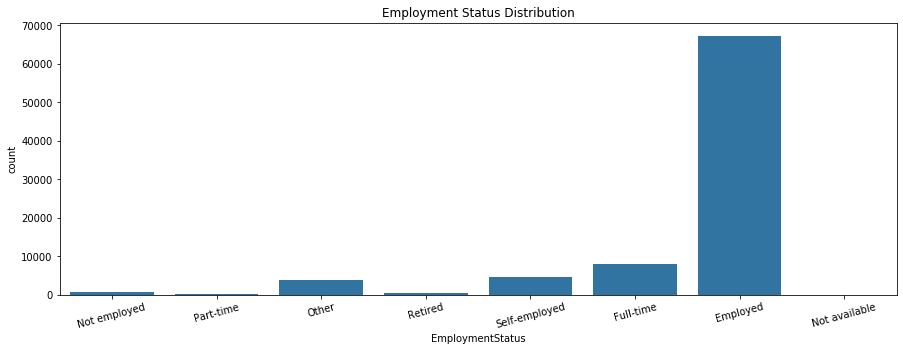

In [35]:
#creating a bar chart for the employment status
plt.figure(figsize = [15, 5])
color = sb.color_palette()[0]
sb.countplot(df_clean.EmploymentStatus, color = color)
plt.xticks(rotation = 15)
plt.title('Employment Status Distribution');

In line with expectations the Category Not employed, Part-time and Retired are very small. The biggest category is Employed followed by Full-time.

In [36]:
df_clean.EmploymentStatus.value_counts()

Employed         67310
Full-time         7927
Self-employed     4538
Other             3806
Not employed       649
Retired            367
Part-time          256
Not available        0
Name: EmploymentStatus, dtype: int64

The category `Not available` is due to the cleaning empty and can be removed

In [37]:
ordered_EmploymentStatus = pd.api.types.CategoricalDtype(ordered = True, categories = ['Not employed', 'Part-time', 'Other', 'Retired', 'Self-employed', 'Full-time', 'Employed'])
df_clean.EmploymentStatus = df_clean.EmploymentStatus.astype(ordered_EmploymentStatus)

In [38]:
df_clean.EmploymentStatus.value_counts()

Employed         67310
Full-time         7927
Self-employed     4538
Other             3806
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

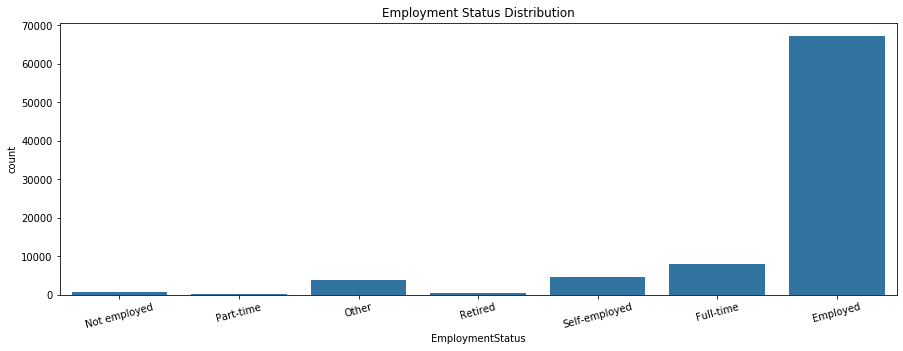

In [39]:
#creating the modified bar chart for the employment status
plt.figure(figsize = [15, 5])
color = sb.color_palette()[0]
sb.countplot(df_clean.EmploymentStatus, color = color)
plt.xticks(rotation = 15)
plt.title('Employment Status Distribution');

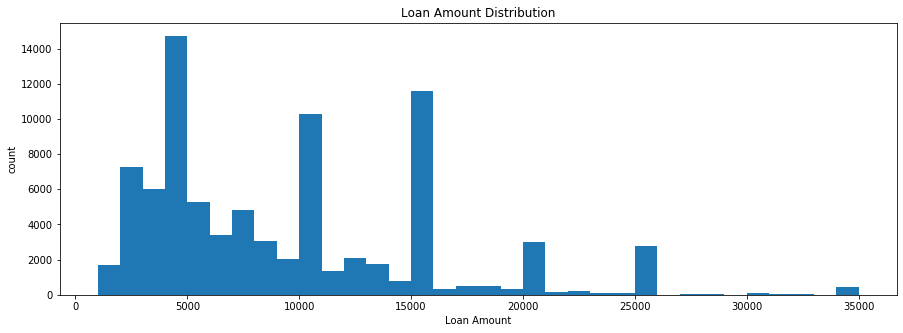

In [40]:
#creating a histogram for LoanOriginalAmount
plt.figure(figsize = [15, 5])
bins = np.arange(df_clean.LoanOriginalAmount.min(), df_clean.LoanOriginalAmount.max()+1000, 1000)
plt.hist(data = df_clean, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('count');

There are 3 peaks in the Loan Amount distribution at 4k, 10k, and 15k.

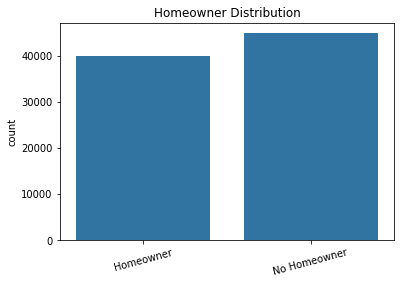

In [41]:
#creating a bar chart for home owners
color = sb.color_palette()[0]
sb.countplot(df_clean.IsBorrowerHomeowner, color = color)
plt.xticks(rotation = 15)
plt.title('Homeowner Distribution')
plt.xlabel('')
plt.xticks(ticks = [0,1], labels = {'No Homeowner', 'Homeowner'});

There are lil bit more Homeowner than borrower who don't own a home.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The main variable `Borrower APR` is nearly normal distributed beside one peak at the higher end (~0.36). I zoomed in to the main area between 0.05 and 0.4 to get a better picture of the distribution and identified beside the mentioned peak no further unregularities.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The variable `Prosper Rating` had lots of NaN values which were removed in order to only look at loans which have a `Prosper Rating`. Due to this the set categories for `Employment Status` and `Income Range` had no values in the NaN categorie and therefore this category was removed. The `Borrower APR` histogram wasn't altered much shapewise due to this.

## Bivariate Exploration

Now I will look at the pairwise correlaton of the data above.

In [42]:
numeric_vars = ['BorrowerAPR', 'LoanOriginalAmount']
categoric_vars = ['ProsperRating_Alpha', 'Term', 'IncomeRange', 'EmploymentStatus', 'IsBorrowerHomeowner']

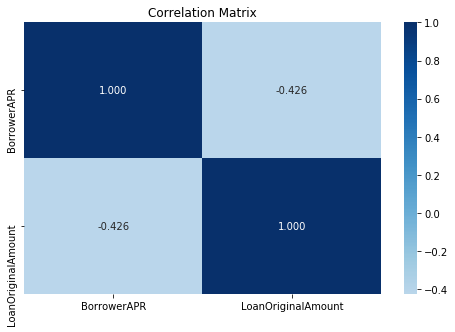

In [43]:
# correlation plot for numeric variables
plt.figure(figsize = [8, 5])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'Blues', center = 0)
plt.title('Correlation Matrix')
plt.show();

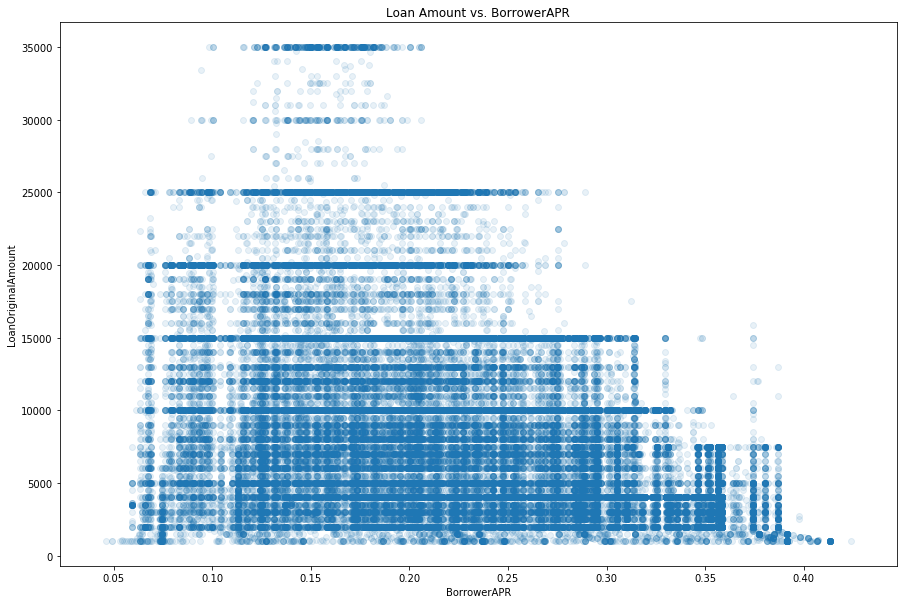

In [44]:
plt.figure(figsize = [15, 10])
sb.regplot(data = df_clean, x = 'BorrowerAPR', y = 'LoanOriginalAmount', scatter_kws = {'alpha' : 0.1}, fit_reg = False)
plt.title('Loan Amount vs. BorrowerAPR');

There seems to be a weak negative correlation between loan amount and BorrowerAPR. High BorrowerAPR is only found with smaller loans. While the high loan amounts are mainly in the second quartil (0.163 - 0.219).

<Figure size 720x720 with 0 Axes>

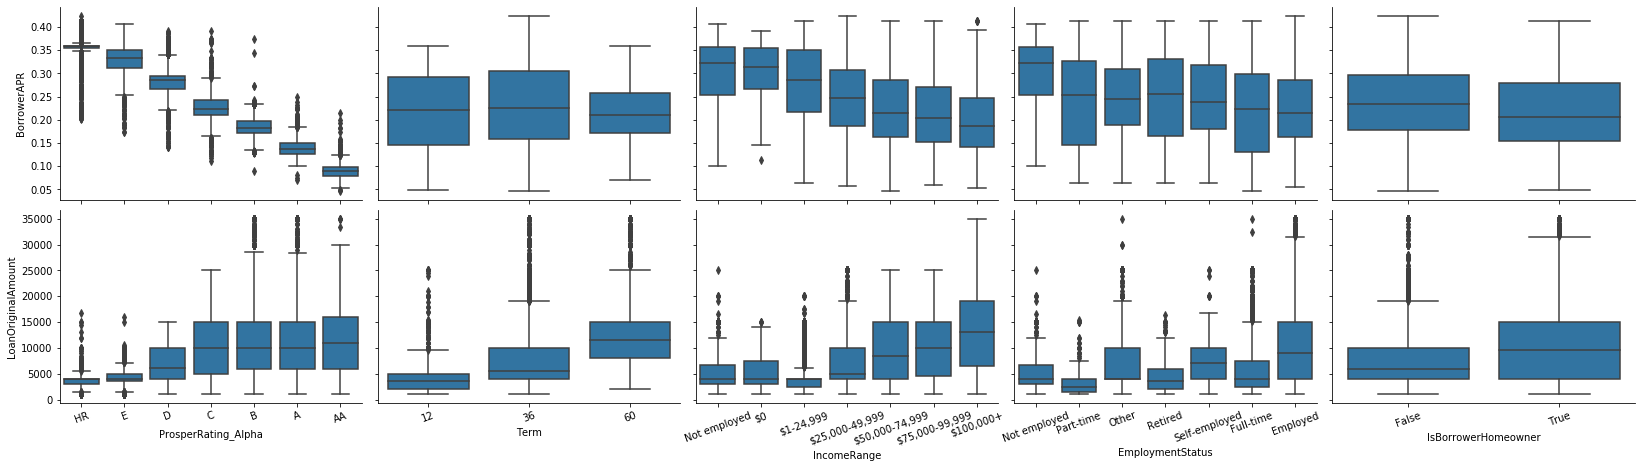

In [45]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 20);

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_clean, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

Like expected the ProsperRating has the biggest impact on the Borrower APR. We can see a clear negative correlation in the graph, the better the rating the lower the Borrower APR. The term doesn't seem to have much impact on the Borrower APR. But the Income Range shows as well a negative correlation in the graph. This is expected. The higher the Income the lower is the Borrower APR. Not being employed has the worst impact on the Borrower APR (higher) compared to other Employment Status categories. Being a home owner or not only has a slight influence when it comes to the Borrower APR.
When we look at the Loan Amount the PrsoperRating has a positive correlation, the better the rating the higher the mean Loan Amount. The same seems to be true for the Term. 10 year loans are on average higher than 12 year loans. The higher the Income range the higher is the mean Loan amount which was expected as well. Interesting here is that the Not employed and 0 Category seems to have higher amounts than the 1-25k category. For Employment Status we can say that being Employed grants higher loan amounts than being not employed while the smallest loans are taken out by Part-time workers. Being a home owner also seems to beneficial to get higher Loan Amounts.

Now we will look at the relationships between the Prosper Rating and the other categorical variables chosen above.

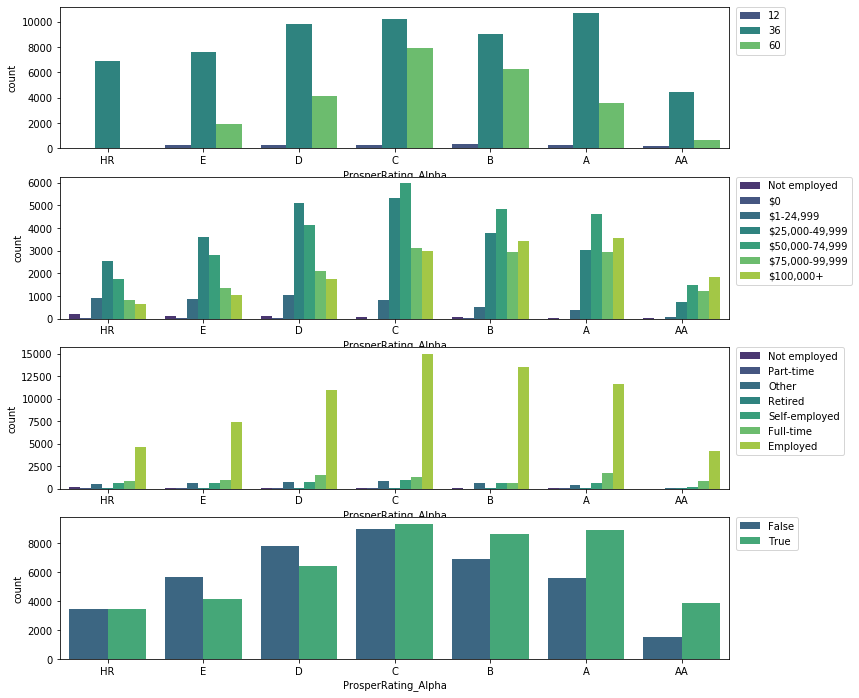

In [46]:
#Creating 4 subplots
plt.figure(figsize = [12, 12])
#subplot 1: ProsperRating vs Term
ax = plt.subplot(4, 1, 1)
sb.countplot(data = df_clean, x = 'ProsperRating_Alpha', hue = 'Term', palette = 'viridis')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
#subplot 2: ProsperRating vs IncomeRange
ax = plt.subplot(4, 1, 2)
sb.countplot(data = df_clean, x = 'ProsperRating_Alpha', hue = 'IncomeRange', palette = 'viridis')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
#subplot 3: ProsperRating vs EmploymentStatus
ax = plt.subplot(4, 1, 3)
sb.countplot(data = df_clean, x = 'ProsperRating_Alpha', hue = 'EmploymentStatus', palette = 'viridis')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
#subplot 4: ProsperRating vs IncomeRange
ax = plt.subplot(4, 1, 4)
sb.countplot(data = df_clean, x = 'ProsperRating_Alpha', hue = 'IsBorrowerHomeowner', palette = 'viridis')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.);

In [47]:
#Category Not employed of EmploymentStatus grouped by ProsperRating
unemployed = df_clean.query('EmploymentStatus == "Not employed"')
unemployed.groupby(['ProsperRating_Alpha']).EmploymentStatus.count()

ProsperRating_Alpha
HR    201
E     130
D     132
C      82
B      53
A      46
AA      5
Name: EmploymentStatus, dtype: int64

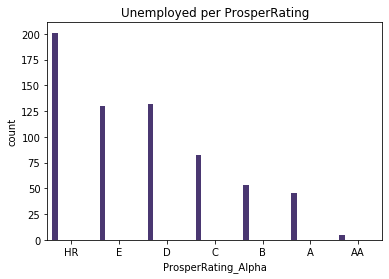

In [48]:
ax = sb.countplot(data = unemployed, x = 'ProsperRating_Alpha', hue = 'EmploymentStatus', palette = 'viridis')
ax.get_legend().remove()
plt.title('Unemployed per ProsperRating');

There doesn't seem to be much of a relationship between ProsperRating and Term. 

For the relationship between ProsperRating and IncomeRange we can say that the lower Income Ranges are dominant in the lower ratings with 25-50k being the most in Rating HR, E and D. Rating C, B and A have the highest count in the Range 50-75k while the even higher Ranges are more present as well. In the top Rating the 100k+ range is the highest. 

Looking at EmploymentStatus the Employed category is normal distributed over the ProsperRating. The Not employed category decreases the better the rating. To show this better I created another plot with only the Not employed category over the ProsperRating.

While homeowner and not-homeowner are equal for the worst Rating (HR) the proportion changes in favor of homeowners from Rating E till AA. At rating E there are more not-homeowner than homeowner while at C it's nearly equal and AA has more homeowner than not-homeowner.

I will look deeper into the BorrowerAPR and ProsperRating using a violin and a boxplot

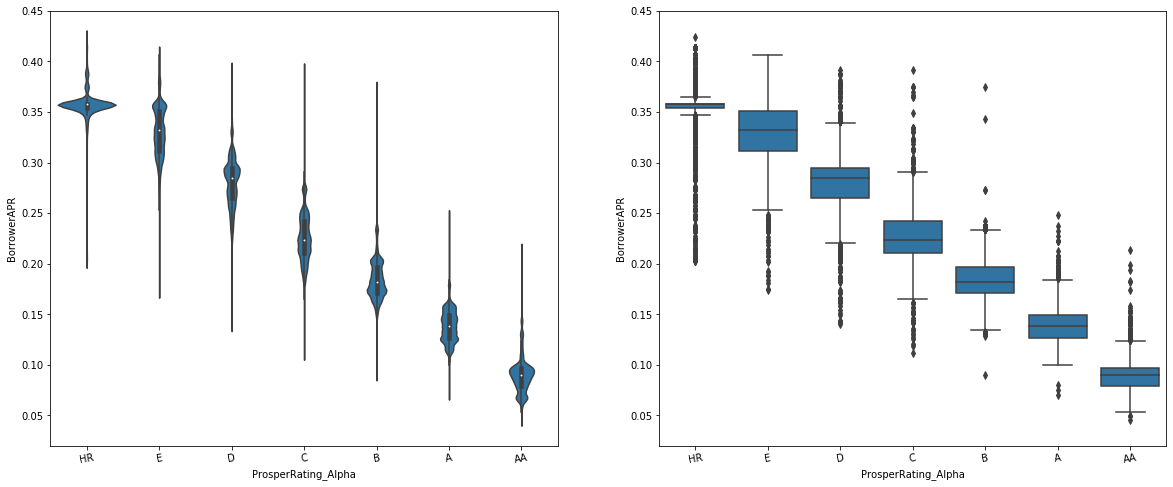

In [49]:
plt.figure(figsize = [20, 8])
color = sb.color_palette()[0]

plt.subplot(1,2,1)
ax = sb.violinplot(data = df_clean, x = 'ProsperRating_Alpha', y = 'BorrowerAPR', color = color)
plt.xticks(rotation = 10)

plt.subplot(1,2,2)
sb.boxplot(data = df_clean, x = 'ProsperRating_Alpha', y = 'BorrowerAPR', color = color)
plt.ylim(ax.get_ylim())
plt.xticks(rotation = 10);

There is a clear negative correlation between ProsperRating and BorrowerAPR. The bulk of the data per rating is each in a 0.05 range of the BorrowerAPR. There are lots of outliers though. for the lowest rating HR the BorrowerAPR is even more compressed around 0.36.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The BorrowerAPR has a high negative correlation with ProsperRating. This confirmed my expectation. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The relationship between homeowner and BorrowerAPR was not like I expected it. They got nearly the same BorrowerAPR. The other variables were in line with my expectations. Higher income resulted in higher loan amounts and a lower BorrowerAPR as well as a better ProsperRating. While being unemployed was not benefical to any of these. 

## Multivariate Exploration

After the bivariate exploration I will now look at multivariate exploration. The main focus will be again on the BorrowerAPR in combination with the ProsperRating adding a third variable.

In [50]:
#Creating a function that creates heat maps with seaborn's PairGrid for ProsperRating over BorrowerAPR
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_y = np.arange(df_clean.BorrowerAPR.min(), df_clean.BorrowerAPR.max()+0.01, 0.01)
    bins_x = np.arange(0, 8+1, 1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.xticks(np.arange(8)+0.5, ['','HR','E','D','C', 'B', 'A', 'AA'])
    plt.xlim(1,8)

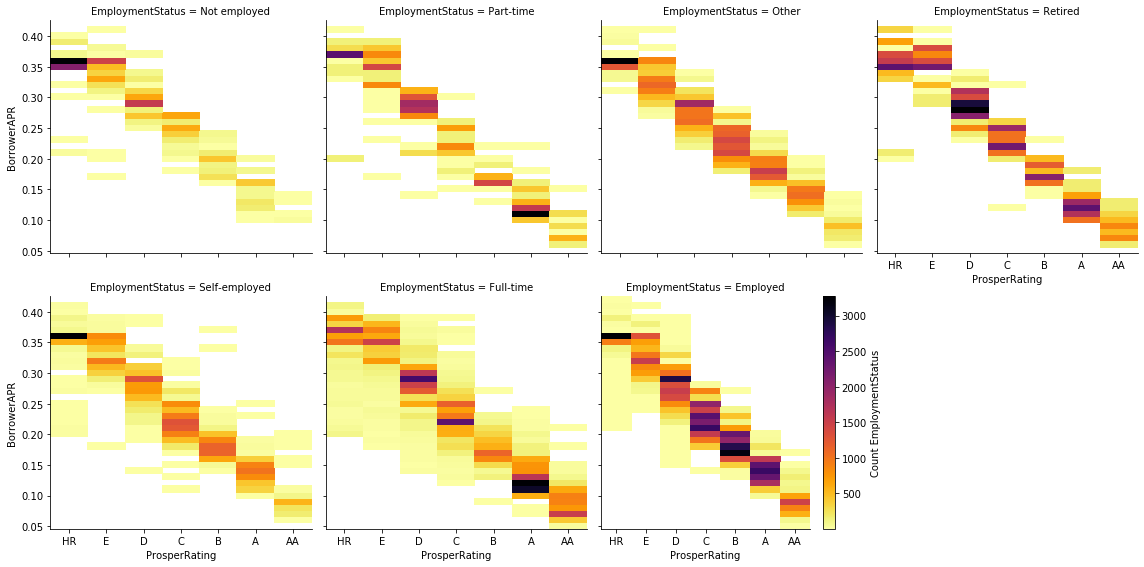

In [51]:
# create faceted heat maps on different EmploymentStatus
g = sb.FacetGrid(data = df_clean, col = 'EmploymentStatus', col_wrap = 4, height = 4)
g.map(hist2dgrid, 'ProsperRating_numeric', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('ProsperRating')
g.set_ylabels('BorrowerAPR')
plt.colorbar(label = 'Count EmploymentStatus')

plt.show()

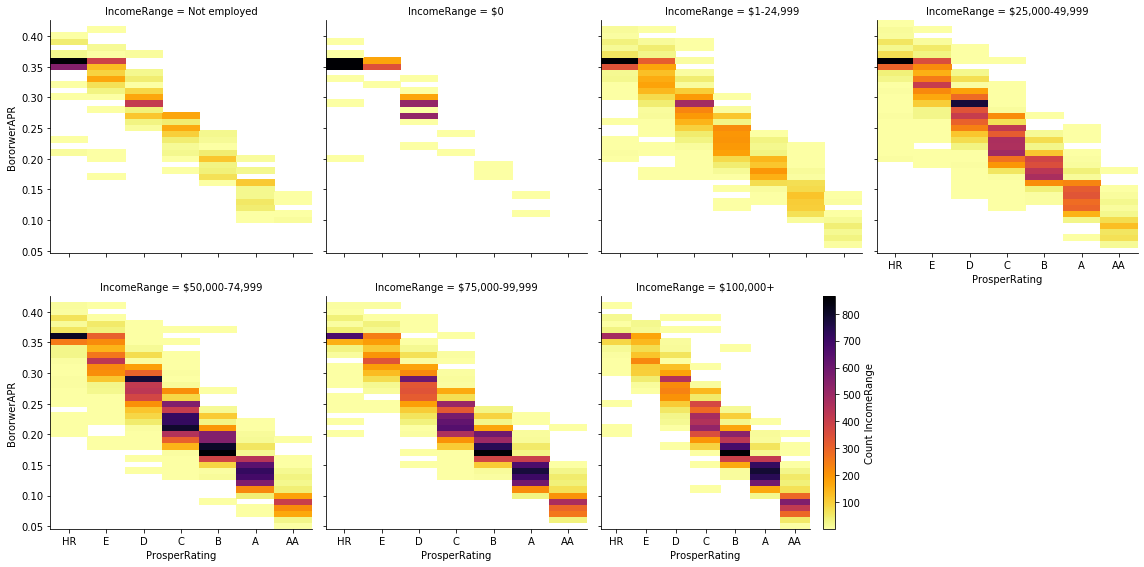

In [52]:
# create faceted heat maps on different IncomeRanges
g = sb.FacetGrid(data = df_clean, col = 'IncomeRange', col_wrap = 4, height = 4)
g.map(hist2dgrid, 'ProsperRating_numeric', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('ProsperRating')
g.set_ylabels('BororwerAPR')
plt.colorbar(label = 'Count IncomeRange')

plt.show()

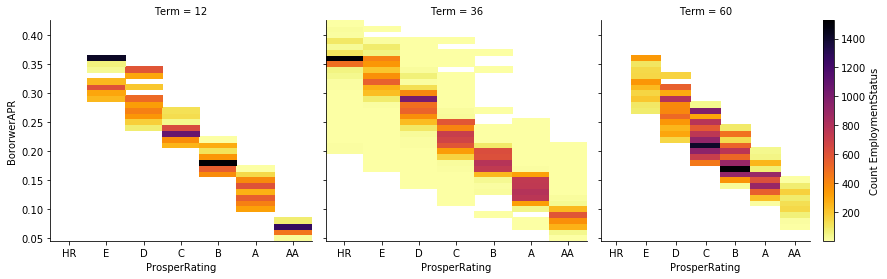

In [53]:
# create faceted heat maps on different Terms
g = sb.FacetGrid(data = df_clean, col = 'Term', col_wrap = 4, height = 4)
g.map(hist2dgrid, 'ProsperRating_numeric', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('ProsperRating')
g.set_ylabels('BororwerAPR')
plt.colorbar(label = 'Count EmploymentStatus')

plt.show()

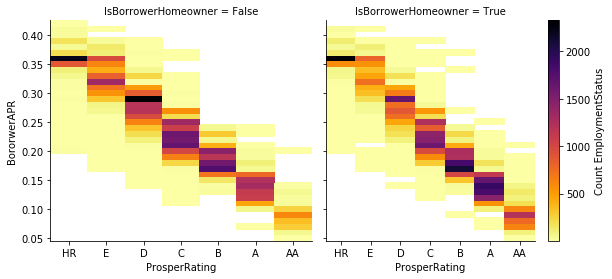

In [54]:
# create faceted heat maps on Homeowner
g = sb.FacetGrid(data = df_clean, col = 'IsBorrowerHomeowner', col_wrap = 4, height = 4)
g.map(hist2dgrid, 'ProsperRating_numeric', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('ProsperRating')
g.set_ylabels('BororwerAPR')
plt.colorbar(label = 'Count EmploymentStatus')

plt.show()

All the heatmaps show the negative correlation between BorrowerAPR and ProsperRating. Especially for the income range its clearly visible how a higher income range leads also to a lower BorrowerAPR.

To make this even more clear I will create a multivariate point plot for the BorrowerAPR over the ProsperRating and the multiple IncomeRanges.

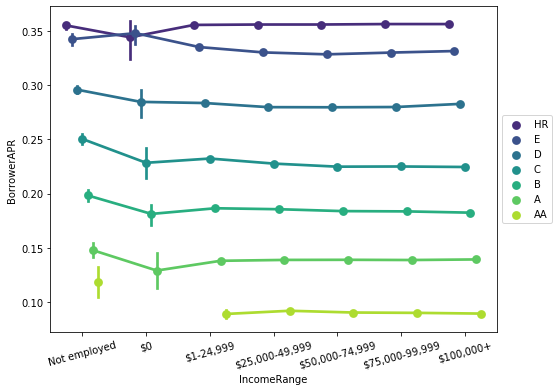

In [55]:
plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'IncomeRange', y = 'BorrowerAPR', hue = 'ProsperRating_Alpha', dodge = 0.5, palette = 'viridis')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15);

We see that the ProsperRating already includes most likely the IncomeRange and therefore there isn't much fluctation within the different ProsperRatings when it comes to the IncomeRanges.

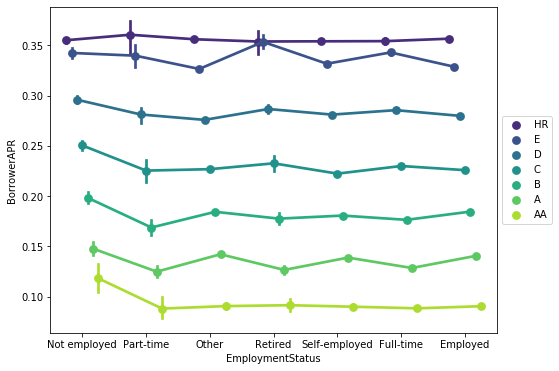

In [56]:
plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'ProsperRating_Alpha', dodge = 0.5, palette = 'viridis')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)); # legend to right of figure

We can say the same about the EmploymentStatus and the ProsperRating.

Now I will create a heatmap with LoanAmount, BorrowerAPR and ProsperRating

In [57]:
#Creating a function that creates heat maps with seaborn's PairGrid for LoanOriginalAmount over BorrowerAPR
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_y = np.arange(df_clean.BorrowerAPR.min(), df_clean.BorrowerAPR.max()+0.01, 0.01)
    bins_x = np.arange(df_clean.LoanOriginalAmount.min(), df_clean.LoanOriginalAmount.max()+1000, 1000)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.xticks(rotation = 15)

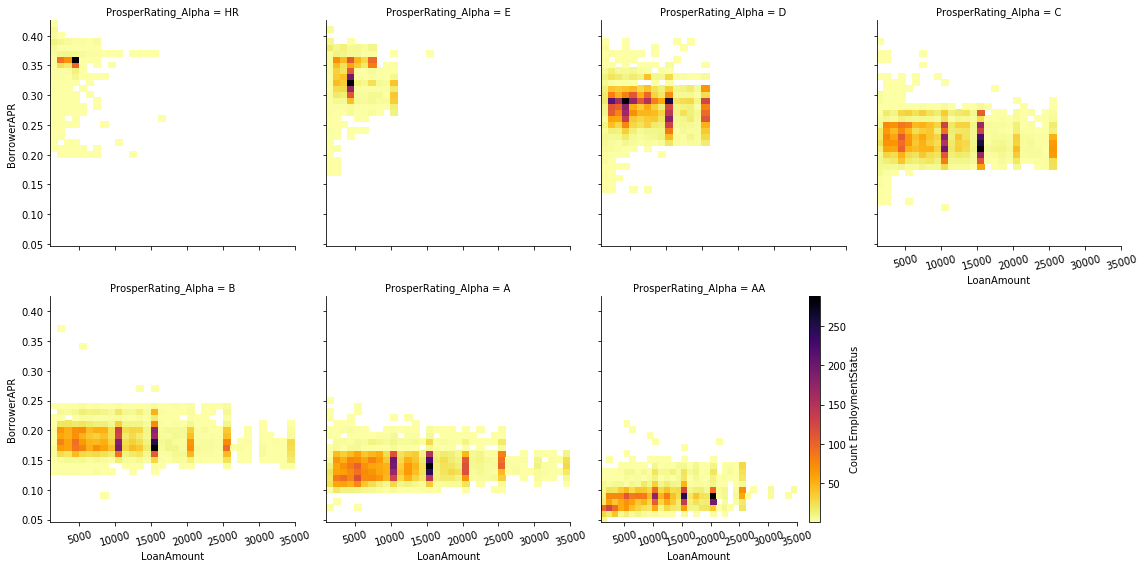

In [58]:
# create faceted heat maps on Homeowner
g = sb.FacetGrid(data = df_clean, col = 'ProsperRating_Alpha', col_wrap = 4, height = 4)
g.map(hist2dgrid, 'LoanOriginalAmount', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('LoanAmount')
g.set_ylabels('BorrowerAPR')
plt.colorbar(label = 'Count EmploymentStatus')

plt.show()

These plots show that with a low ProsperRating only low LoanAmounts are possible. The higher amounts (eg. above 30k) are only available in the top 3 ProsperRatings.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I looked deeper into the correlation between ProsperRating and the BorrowerAPR. My expectation that BorrowerAPR is most influenced by the PrsoperRating was confirmed. Other variables don't have that much impact anymore on the BorrowerAPR in combination with ProsperRating since they are most likely already factored in the ProsperRating.

### Were there any interesting or surprising interactions between features?

The variables like IncomeRange, EmploymentStatus and Term are not independent from the ProsperRating. The LoanAmount seems to be capped due to the ProsperRating.